# 2.3 Matplotlib数据可视化基础

**2.3.1 基本图形绘制**

(1) 折线图

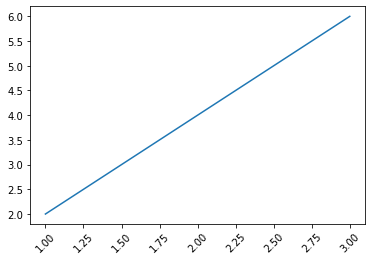

In [2]:
import matplotlib.pyplot as plt
x = [1, 2, 3]
y = [2, 4, 6]
plt.plot(x, y)  # 绘制折线图
import pylab as pl
pl.xticks(rotation=45)
plt.show()  # 展示图形

如果想让x和y之间有些数学关系，列表是不太容易进行数学运算的，这时候就可以通过2.1.2小节所讲的Numpy库引入一维数组进行数学运算，代码如下：

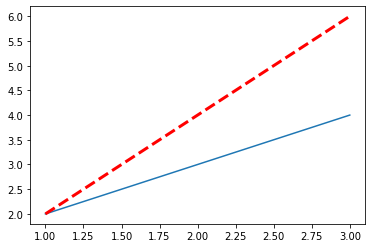

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([1, 2, 3])

# 第一条线：y = x + 1
y1 = x1 + 1
plt.plot(x1, y1) # 使用默认参数画图

# 第二条线：y = x*2
y2 = x1*2
# color设置颜色，linewidth设置线宽，单位像素，linestyle默认为实线，“--”表示虚线
plt.plot(x1, y2, color='red', linewidth=3, linestyle='--')

plt.show()

(2) 柱状图

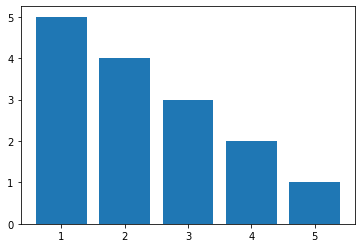

In [4]:
import matplotlib.pyplot as plt
x = [1, 2, 3, 4, 5]
y = [5, 4, 3, 2, 1]
plt.bar(x, y)
plt.show()

(3) 散点图

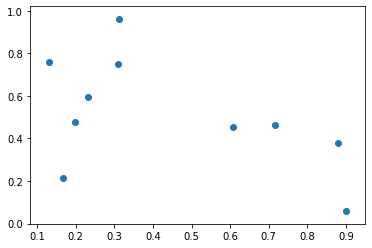

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(10)
y = np.random.rand(10)
plt.scatter(x, y)
plt.show()

(4) 直方图

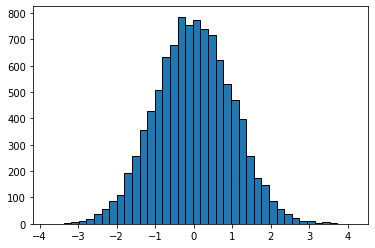

In [6]:
import matplotlib.pyplot as plt
import numpy as np  

# 随机生成10000个服从正态分布的数据
data = np.random.randn(10000)

# 绘制直方图，bins为颗粒度，即直方图的长条形数目，edgecolor为长条形边框颜色
plt.hist(data, bins=40, edgecolor='black')

plt.show()

**补充知识点：在pandas库中的快捷绘图技巧**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CB625935C0>]],
      dtype=object)

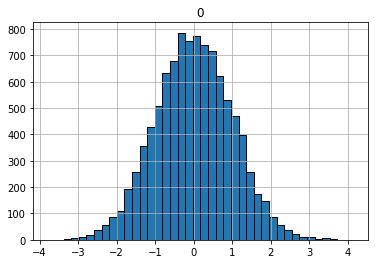

In [7]:
# 这种写法只适合pandas中的DataFrame，不能直接用于Numpy的数组
import pandas as pd
df = pd.DataFrame(data)  # 将绘制直方图中的data数组转换成DataFrame()格式
df.hist(bins=40, edgecolor='black')

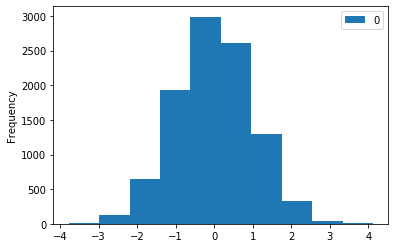

In [8]:
# 此外，除了写df.hist()外，还可以通过下面这种pandas库里的通用绘图代码绘图：
df.plot(kind='hist')

这里是通过设置kind参数为hist来绘制直方图，通过这种通用绘图代码，pandas库除了可以便捷的绘制直方图外，它还可以通过设置kind参数快捷地绘制其他图形，演示代码如下，首先通过2.2.1节的知识点创建一个二维DataFrame表格df。

In [9]:
import pandas as pd
df = pd.DataFrame([[8000, 6000], [7000, 5000], [6500, 4000]], columns=['人均收入', '人均支出'], index=['北京', '上海', '广州'])
df

,人均收入,人均支出
北京,8000,6000
上海,7000,5000
广州,6500,4000


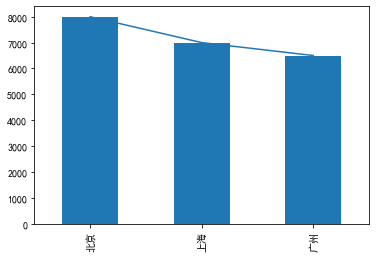

In [10]:
# 此时可以通过pandas同时绘制折线图或者柱状图，代码如下：
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题

df['人均收入'].plot(kind='line')  # kind=line绘制折线图，不设置则默认折线图
df['人均收入'].plot(kind='bar')  # kind=bar绘制柱状图

**2.3.2 数据可视化常见小技巧**

(1) 添加文字说明

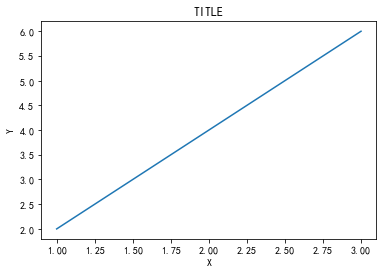

In [11]:
# 通过plt.title(name)给图画添加标题；通过plt.xlable()，plt.ylable()用于添加x轴和y轴标签。
import matplotlib.pyplot as plt

x = [1, 2, 3]
y = [2, 4, 6]
plt.plot(x, y)
plt.title('TITLE')  # 添加标题
plt.xlabel('X')  # 添加X轴标签
plt.ylabel('Y')  # 添加Y轴标签
plt.show()  # 显示图片

(2) 添加图例

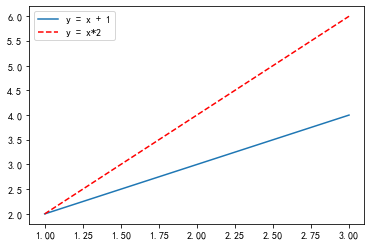

In [12]:
# 通过plt.legend()来添加图例，添加前需要设置好lable（标签）参数，代码如下：
import numpy as np
import matplotlib.pyplot as plt

# 第一条线, 设定标签lable为y = x + 1
x1 = np.array([1, 2, 3])
y1 = x1 + 1
plt.plot(x1, y1, label='y = x + 1') 

# 第二条线, 设定标签lable为y = x*2
y2 = x1*2
plt.plot(x1, y2, color='red', linestyle='--', label='y = x*2')

plt.legend(loc='upper left') # 图例位置设置为左上角
plt.show()

(3) 设置双坐标轴

上面的例子可以在一张图里画出两条线，但如果两条线的取值范围相差比较大，那么画出来的图效果便不太好，那么此时如何来画出两条y坐标轴呢？可以在画完第一个图之后，写如下一行代码即可设置双坐标轴。

plt.twinx()

需要注意的是如果设置了双坐标轴，那么添加图例的时候，每画一次图就得添加一次，而不能在最后统一添加。这里以y = x和y = x^2为例，演示下如何设置双坐标轴，代码如下：

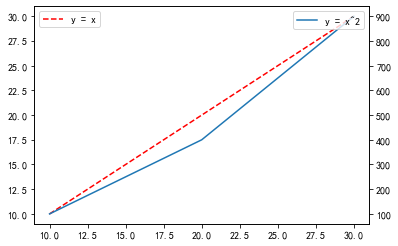

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 第一条线, 设定标签lable为y = x
x1 = np.array([10, 20, 30])
y1 = x1
plt.plot(x1, y1, color='red', linestyle='--', label='y = x')
plt.legend(loc='upper left')  # 该图图例设置在左上角

plt.twinx()  # 设置双坐标轴

# 第二条线, 设定标签lable为y = x^2
y2 = x1*x1
plt.plot(x1, y2, label='y = x^2') 
plt.legend(loc='upper right')  # 改图图例设置在右上角

plt.show()

(4) 设置图片大小

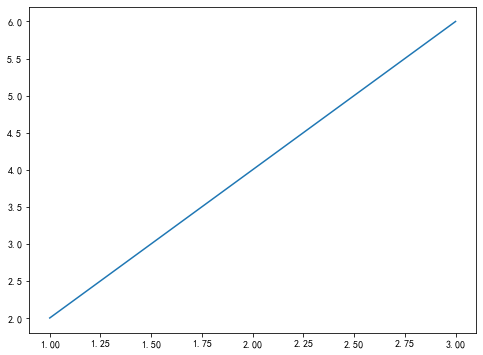

In [14]:
plt.rcParams['figure.figsize'] = (8, 6)
x = [1, 2, 3]
y = [2, 4, 6]
plt.plot(x, y)
plt.show()  # 显示图片

(4) 设置X轴角度

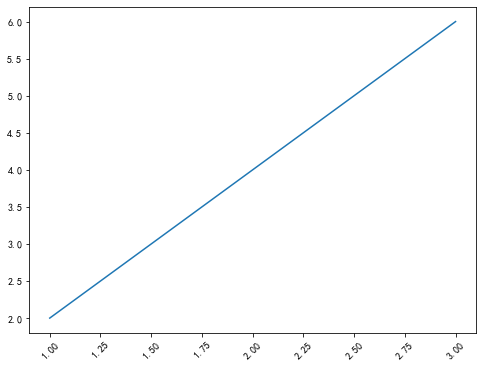

In [15]:
import matplotlib.pyplot as plt
x = [1, 2, 3]
y = [2, 4, 6]
plt.plot(x, y)  # 绘制折线图

import pylab as pl
pl.xticks(rotation=45)  # 设置角度为45度

plt.show()  # 展示图形

(6) 中文显示问题

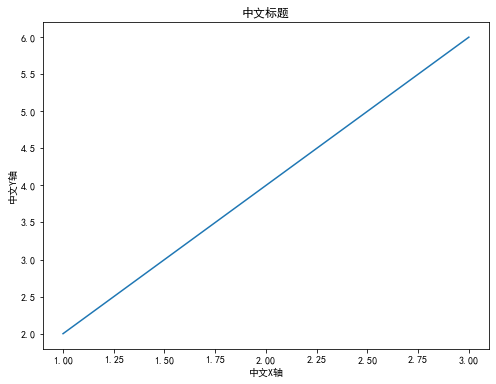

In [16]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题

x = [1, 2, 3]
y = [2, 4, 6]
plt.plot(x, y)
plt.title('中文标题')  # 添加标题
plt.xlabel('中文X轴')  # 添加X轴标签
plt.ylabel('中文Y轴')  # 添加Y轴标签
plt.show()  # 显示图片

(7) 绘制多图

如下图所示，有时我们需要在一张画布上输出多个图形，在Matplotlib库中有当前的图形（figure）以及当前轴（axes）概念，其对应的就是当前画布以及当前子图，在一张画布（figure）上可以绘制多个子图（axes）。绘制多图通常采用subplot()函数或subplots()函数，

![图片解释](https://uploader.shimo.im/f/MZH7f7eX4sAg6ZvA.png!thumbnail)

首先来讲解subplot()函数，如下图所示，它通常含有三个参数，子图的行数、列数以及第几个子图，例如subplot(221)表示的就是绘制2行2列的子图（共4个子图），并在第1个子图上进行绘图。

![图片解释](https://uploader.shimo.im/f/duzkow47Y5koePsG.png!thumbnail)

(array([3., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <a list of 10 Patch objects>)

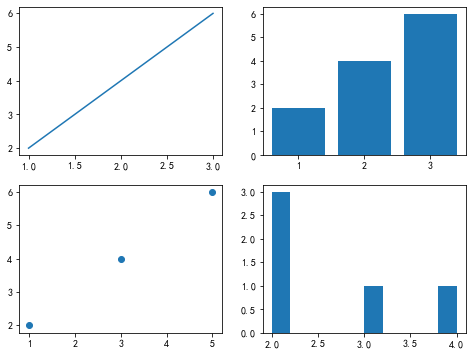

In [17]:
# 演示代码如下：
import matplotlib.pyplot as plt
# 绘制第一个子图：折线图
ax1 = plt.subplot(221)  
plt.plot([1, 2, 3], [2, 4, 6])  # 这里plt其实也可以换成ax1

# 绘制第二个子图：柱状图
ax2 = plt.subplot(222)  
plt.bar([1, 2, 3], [2, 4, 6])

# 绘制第三个子图：散点图
ax3 = plt.subplot(223)  
plt.scatter([1, 3, 5], [2, 4, 6])

# 绘制第四个子图：直方图
ax4 = plt.subplot(224)  
plt.hist([2, 2, 2, 3, 4])

为了加强大家对画布（figure）和子图（axes）的理解，我们通过下面的代码来做一个简单演示：

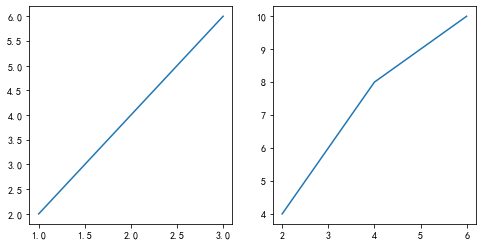

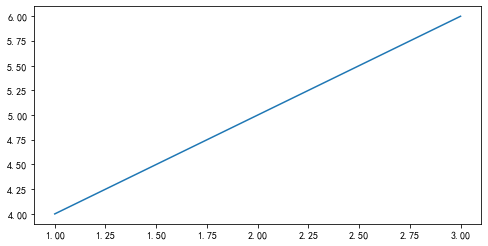

In [18]:
plt.rcParams['figure.figsize'] = (8, 4) # 设置画布大小

plt.figure(1)  # 第一张画布
ax1 = plt.subplot(121)  # 第一张画布的第一个子图
plt.plot([1, 2, 3], [2, 4, 6])  # 这里的plt可以换成ax1

ax2 = plt.subplot(122)  # 第一张画布的第二个子图
plt.plot([2, 4, 6], [4, 8, 10])

plt.figure(2)  # 第二张画布
plt.plot([1, 2, 3], [4, 5, 6])

在使用subplot()函数的时候，每次在新的子图上画图时，都得调用subplot()函数，例如第四个子图就得写成ax4 = plt.subplot(224)，那有没有什么办法，一次性就生成多个子图呢？这时候就可以用到subplots()函数，代码如下：

(array([3., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <a list of 10 Patch objects>)

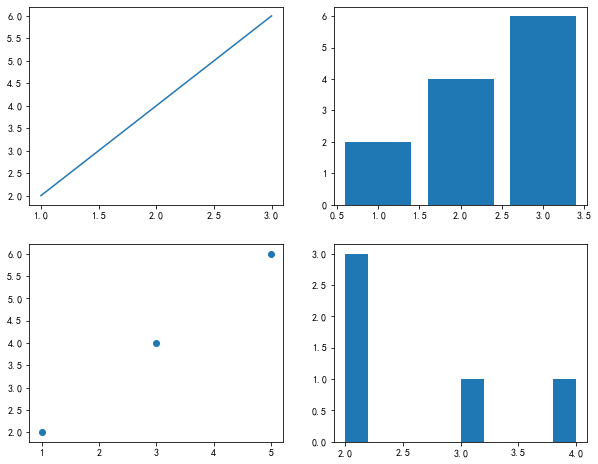

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8)) 
ax1, ax2, ax3, ax4 = axes.flatten()
ax1.plot([1, 2, 3], [2, 4, 6])  # 绘制第一个子图
ax2.bar([1, 2, 3], [2, 4, 6])  # 绘制第二个子图
ax3.scatter([1, 3, 5], [2, 4, 6])  # 绘制第三个子图
ax4.hist([2, 2, 2, 3, 4])  # 绘制第四个子图

此外，如果要在subplot()函数或者subplots()函数生成的子图中设置子图标题、X轴标签或Y轴标签，得通过set_title()函数、set_xlabel()函数、set_ylabel()函数进行设置，演示代码如下：

(array([3., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <a list of 10 Patch objects>)

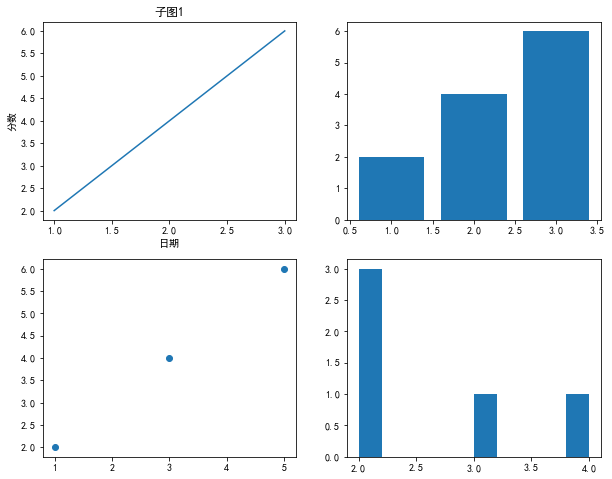

In [20]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
fig, axes = plt.subplots(2, 2, figsize=(10, 8)) 
ax1, ax2, ax3, ax4 = axes.flatten()
ax1.plot([1, 2, 3], [2, 4, 6])  # 绘制第一个子图
ax1.set_title('子图1')
ax1.set_xlabel('日期')
ax1.set_ylabel('分数')
ax2.bar([1, 2, 3], [2, 4, 6])  # 绘制第二个子图
ax3.scatter([1, 3, 5], [2, 4, 6])  # 绘制第三个子图
ax4.hist([2, 2, 2, 3, 4])  # 绘制第四个子图